In [659]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import seaborn as sns

In [660]:
states = pd.read_excel("2007-2016-PIT-Counts-by-State.xlsx")

In [661]:
states.head()

,state,"Change in Total Homelessness, 2015-2016","Change in Total Homelessness, 2014-2016","Change in Total Homelessness, 2013-2016","Change in Total Homelessness, 2012-2016","Change in Total Homelessness, 2011-2016","Change in Total Homelessness, 2010-2016","Change in Total Homelessness, 2009-2016","Change in Total Homelessness, 2008-2016","Change in Total Homelessness, 2007-2016"
0,AK,-0.008180,0.087444,-0.003083,0.014114,-0.088346,0.041331,-0.026104,0.178615,0.181486
1,AL,0.035516,-0.098663,-0.123267,-0.210789,-0.260345,-0.320046,-0.323849,-0.236867,-0.245965
2,AR,-0.037891,-0.161104,-0.353882,-0.415520,-0.280666,-0.108255,-0.136396,-0.243318,-0.357925
3,AZ,-0.019099,-0.075083,-0.080951,-0.141125,-0.075876,-0.292028,-0.340602,-0.222694,-0.337225
4,CA,0.020771,0.036770,-0.003458,-0.016287,-0.055831,-0.043230,-0.044761,-0.134687,-0.149972


In [662]:
details_16 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx")

In [663]:
details_16.head()

,CoC Number,CoC Name,"Total Homeless, 2016","Sheltered Homeless, 2016","Unsheltered Homeless, 2016","Homeless Individuals, 2016","Sheltered Homeless Individuals, 2016","Unsheltered Homeless Individuals, 2016","Homeless People in Families, 2016","Sheltered Homeless People in Families, 2016",...,"Unsheltered Parenting Youth (Under 25), 2016","Parenting Youth Under 18, 2016","Sheltered Parenting Youth Under 18, 2016","Unsheltered Parenting Youth Under 18, 2016","Parenting Youth Age 18-24, 2016","Sheltered Parenting Youth Age 18-24, 2016","Unsheltered Parenting Youth Age 18-24, 2016","Children of Parenting Youth, 2016","Sheltered Children of Parenting Youth, 2016","Unsheltered Children of Parenting Youth, 2016"
0,AK-500,Anchorage CoC,1105.0,865.0,240.0,905.0,665.0,240.0,200.0,200.0,...,0.0,0.0,0.0,0.0,6.0,6.0,0.0,6.0,6.0,0.0
1,AK-501,Alaska Balance of State CoC,835.0,633.0,202.0,622.0,424.0,198.0,213.0,209.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,4.0,0.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1228.0,1032.0,196.0,927.0,743.0,184.0,301.0,289.0,...,0.0,5.0,5.0,0.0,7.0,7.0,0.0,19.0,19.0,0.0
3,AL-501,Mobile City & County/Baldwin County CoC,623.0,387.0,236.0,477.0,253.0,224.0,146.0,134.0,...,1.0,0.0,0.0,0.0,7.0,6.0,1.0,9.0,8.0,1.0
4,AL-502,Florence/Northwest Alabama CoC,337.0,286.0,51.0,194.0,155.0,39.0,143.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [664]:
details = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx")

In [665]:
details

,CoC Number,CoC Name,"Total Homeless, 2016","Sheltered Homeless, 2016","Unsheltered Homeless, 2016","Homeless Individuals, 2016","Sheltered Homeless Individuals, 2016","Unsheltered Homeless Individuals, 2016","Homeless People in Families, 2016","Sheltered Homeless People in Families, 2016",...,"Unsheltered Parenting Youth (Under 25), 2016","Parenting Youth Under 18, 2016","Sheltered Parenting Youth Under 18, 2016","Unsheltered Parenting Youth Under 18, 2016","Parenting Youth Age 18-24, 2016","Sheltered Parenting Youth Age 18-24, 2016","Unsheltered Parenting Youth Age 18-24, 2016","Children of Parenting Youth, 2016","Sheltered Children of Parenting Youth, 2016","Unsheltered Children of Parenting Youth, 2016"
0,AK-500,Anchorage CoC,1105.0,865.0,240.0,905.0,665.0,240.0,200.0,200.0,...,0.0,0.0,0.0,0.0,6.0,6.0,0.0,6.0,6.0,0.0
1,AK-501,Alaska Balance of State CoC,835.0,633.0,202.0,622.0,424.0,198.0,213.0,209.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,4.0,0.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1228.0,1032.0,196.0,927.0,743.0,184.0,301.0,289.0,...,0.0,5.0,5.0,0.0,7.0,7.0,0.0,19.0,19.0,0.0
3,AL-501,Mobile City & County/Baldwin County CoC,623.0,387.0,236.0,477.0,253.0,224.0,146.0,134.0,...,1.0,0.0,0.0,0.0,7.0,6.0,1.0,9.0,8.0,1.0
4,AL-502,Florence/Northwest Alabama CoC,337.0,286.0,51.0,194.0,155.0,39.0,143.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AL-503,Huntsville/North Alabama CoC,385.0,298.0,87.0,283.0,196.0,87.0,102.0,102.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0
6,AL-504,Montgomery City & County CoC,367.0,293.0,74.0,285.0,214.0,71.0,82.0,79.0,...,1.0,0.0,0.0,0.0,3.0,2.0,1.0,6.0,5.0,1.0
7,AL-505,Gadsden/Northeast Alabama CoC,167.0,91.0,76.0,133.0,70.0,63.0,34.0,21.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
8,AL-506,Tuscaloosa City & County CoC,177.0,47.0,130.0,105.0,33.0,72.0,72.0,14.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,2.0,1.0
9,AL-507,Alabama Balance of State CoC,827.0,459.0,368.0,615.0,353.0,262.0,212.0,106.0,...,3.0,0.0,0.0,0.0,5.0,2.0,3.0,5.0,2.0,3.0


In [666]:
df = pd.read_csv("2007-2016-HIC-Counts-by-CoC.csv")

In [667]:
df.head(200)

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842
5,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless Individuals,589
6,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless People in Families,253
7,1/1/2007,AK,AK-500,Anchorage CoC,Total Homeless,974
8,1/1/2007,AK,AK-500,Anchorage CoC,Unsheltered Chronically Homeless Individuals,37
9,1/1/2007,AK,AK-500,Anchorage CoC,Unsheltered Homeless,132


In [668]:
df.Measures.unique()

array(['Chronically Homeless Individuals', 'Homeless Individuals',
       'Homeless People in Families',
       'Sheltered Chronically Homeless Individuals', 'Sheltered Homeless',
       'Sheltered Homeless Individuals',
       'Sheltered Homeless People in Families', 'Total Homeless',
       'Unsheltered Chronically Homeless Individuals',
       'Unsheltered Homeless', 'Unsheltered Homeless Individuals',
       'Unsheltered Homeless People in Families', 'Chronically Homeless',
       'Chronically Homeless People in Families', 'Homeless Veterans',
       'Sheltered Chronically Homeless',
       'Sheltered Chronically Homeless People in Families',
       'Sheltered Homeless Veterans', 'Unsheltered Chronically Homeless',
       'Unsheltered Chronically Homeless People in Families',
       'Unsheltered Homeless Veterans', 'Children of Parenting Youth',
       'Homeless Unaccompanied Children (Under 18)',
       'Homeless Unaccompanied Young Adults (Age 18-24)',
       'Homeless Unaccompan

In [669]:
df.shape

(86529, 6)

In [670]:
df.dtypes

Year          object
State         object
CoC Number    object
CoC Name      object
Measures      object
Count         object
dtype: object

In [671]:
df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum().head()

Count
State Year              
AK    1/1/2007    974668
      1/1/2008  1,023623
      1/1/2009  1,267725
      1/1/2010  1,231632
      1/1/2011  1,223905

In [672]:
df['Count'] = df['Count'].str.replace(',', '').astype(int)

In [673]:
df.dtypes

Year          object
State         object
CoC Number    object
CoC Name      object
Measures      object
Count          int64
dtype: object

In [674]:
df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum().head()

Count
State Year           
AK    1/1/2007   1642
      1/1/2008   1646
      1/1/2009   1992
      1/1/2010   1863
      1/1/2011   2128

In [675]:
df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum().head()

Count
State Year           
AK    1/1/2007   1642
      1/1/2008   1646
      1/1/2009   1992
      1/1/2010   1863
      1/1/2011   2128

In [676]:
import re

In [677]:
df['Year'] = df['Year'].str.extract('\d{1,2}/\d{1,2}/(\d{2,4})')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [678]:
df.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [679]:
df.drop(['CoC Number','CoC Name'], axis=1, inplace=True)

In [680]:
df.head()

,Year,State,Measures,Count
0,2007,AK,Chronically Homeless Individuals,224
1,2007,AK,Homeless Individuals,696
2,2007,AK,Homeless People in Families,278
3,2007,AK,Sheltered Chronically Homeless Individuals,187
4,2007,AK,Sheltered Homeless,842


In [681]:
df.groupby('Measures')['Count'].sum().sort_values(ascending=False).head()

Measures
Total Homeless                 6081137
Sheltered Homeless             3927844
Homeless Individuals           3816262
Homeless People in Families    2264875
Unsheltered Homeless           2153293
Name: Count, dtype: int64

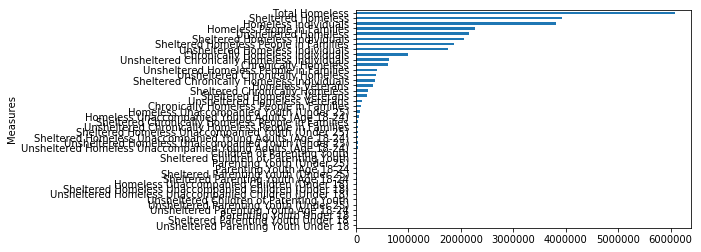

In [682]:
df.groupby('Measures')['Count'].sum().sort_values(ascending=True).plot(kind='barh', )

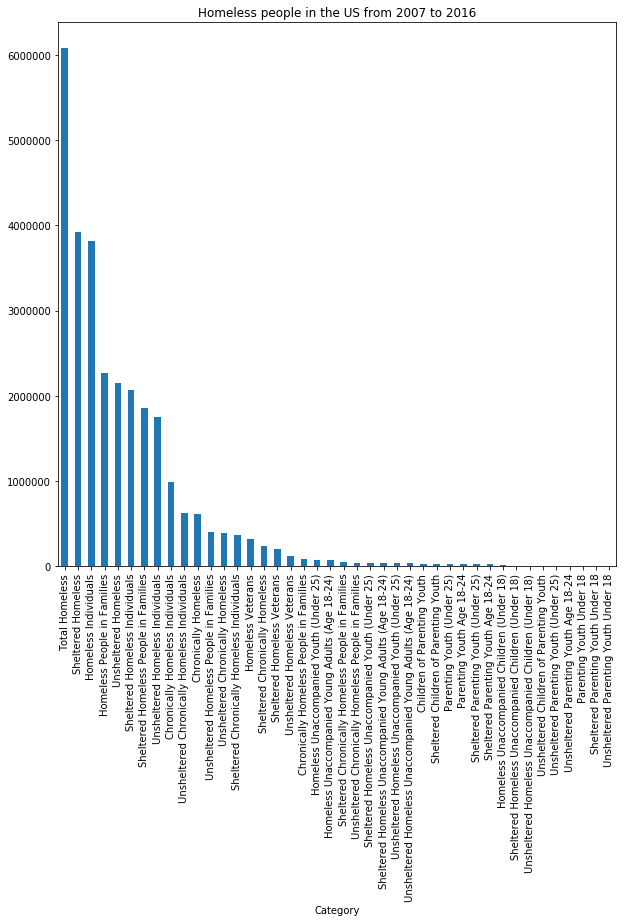

In [683]:
ax = df.groupby('Measures')['Count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))
ax.set_title("Homeless people in the US from 2007 to 2016")
ax.set_xlabel("Category")

plt.savefig("homeless_category.pdf")

In [684]:
shel = df[df['Measures'] == 'Sheltered Homeless'] 
shel.head()

,Year,State,Measures,Count
4,2007,AK,Sheltered Homeless,842
16,2007,AK,Sheltered Homeless,545
28,2007,AL,Sheltered Homeless,1240
40,2007,AL,Sheltered Homeless,410
52,2007,AL,Sheltered Homeless,131


In [685]:
unshel = df[df['Measures'] == 'Unsheltered Homeless']
unshel.head()

,Year,State,Measures,Count
9,2007,AK,Unsheltered Homeless,132
21,2007,AK,Unsheltered Homeless,123
33,2007,AL,Unsheltered Homeless,864
45,2007,AL,Unsheltered Homeless,239
57,2007,AL,Unsheltered Homeless,134


In [686]:
shel.Count.sum()

3927844

In [687]:
unshel.Count.sum()

2153293

In [688]:
#just checking that the number is correct with the result 
3927844 + 2153293

6081137

In [689]:
unshel_kids = df[df['Measures'] == 'Unsheltered Homeless Unaccompanied Children (Under 18)']
unshel_kids.head()

,Year,State,Measures,Count
52754,2015,AK,Unsheltered Homeless Unaccompanied Children (U...,3
52796,2015,AK,Unsheltered Homeless Unaccompanied Children (U...,3
52838,2015,AL,Unsheltered Homeless Unaccompanied Children (U...,0
52880,2015,AL,Unsheltered Homeless Unaccompanied Children (U...,0
52922,2015,AL,Unsheltered Homeless Unaccompanied Children (U...,0


In [690]:
shel_kids = df[df['Measures'] == 'Sheltered Homeless Unaccompanied Children (Under 18)']
shel_kids.head()

,Year,State,Measures,Count
52739,2015,AK,Sheltered Homeless Unaccompanied Children (Und...,9
52781,2015,AK,Sheltered Homeless Unaccompanied Children (Und...,9
52823,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,9
52865,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,1
52907,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,0


In [691]:
df_kids = pd.concat([shel_kids, unshel_kids], ignore_index=True)
df_kids

,Year,State,Measures,Count
0,2015,AK,Sheltered Homeless Unaccompanied Children (Und...,9
1,2015,AK,Sheltered Homeless Unaccompanied Children (Und...,9
2,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,9
3,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,1
4,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,0
5,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,3
6,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,2
7,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,9
8,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,0
9,2015,AL,Sheltered Homeless Unaccompanied Children (Und...,3


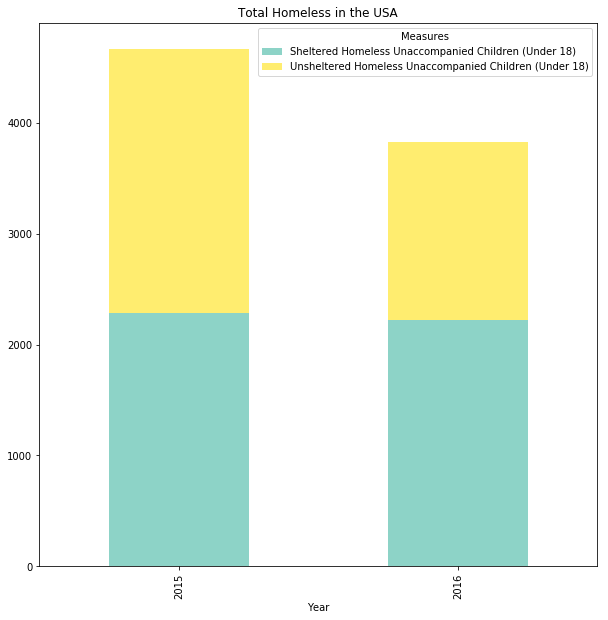

In [692]:
#Sheltered VS Unsheltered kids
df_kids.groupby(['Year', 'Measures'])['Count'].sum().unstack().plot.bar(stacked=True, title='Total Homeless in the USA', legend= True, colormap='Set3', figsize=(10,10))

In [693]:
df_new = pd.concat([shel, unshel], ignore_index=True)
df_new.head()

,Year,State,Measures,Count
0,2007,AK,Sheltered Homeless,842
1,2007,AK,Sheltered Homeless,545
2,2007,AL,Sheltered Homeless,1240
3,2007,AL,Sheltered Homeless,410
4,2007,AL,Sheltered Homeless,131


In [694]:
#sns.barplot(x="Measures", y="Count", data=df)

In [695]:
#plt.rcParams['figure.figsize']=(10,10)
#sns.barplot(x="Count", y="Measures", data=df)

In [696]:
df_new.groupby('Year')['Count'].sum()

Year
2007    647258
2008    639784
2009    630227
2010    637077
2011    623788
2012    621553
2013    590364
2014    576450
2015    564708
2016    549928
Name: Count, dtype: int64

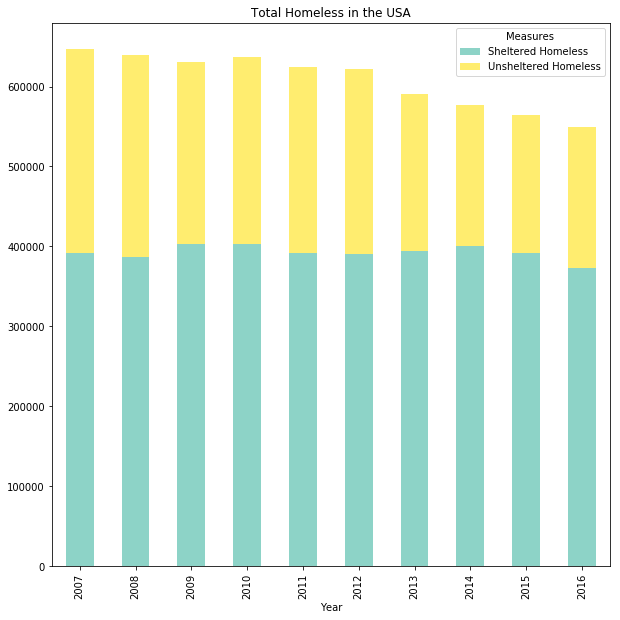

In [697]:
#Sheltered VS Unsheltered 
df_new.groupby(['Year', 'Measures'])['Count'].sum().unstack().plot.bar(stacked=True, title='Total Homeless in the USA', legend= True, colormap='Set3', figsize=(10,10))

In [698]:
#population

df_pop = pd.read_csv("population.csv")
df_pop.head()

,State,2010,2011,2012,2013,2014,2015,2016
0,Alabama,"4,785,492","4,799,918","4,815,960","4,829,479","4,843,214","4,853,875","4,863,300"
1,Alaska,"714,031","722,713","731,089","736,879","736,705","737,709","741,894"
2,Arizona,"6,408,312","6,467,163","6,549,634","6,624,617","6,719,993","6,817,565","6,931,071"
3,Arkansas,"2,921,995","2,939,493","2,950,685","2,958,663","2,966,912","2,977,853","2,988,248"
4,California,"37,332,685","37,676,861","38,011,074","38,335,203","38,680,810","38,993,940","39,250,017"


In [699]:
#df =  df[(df['Year']!= 2007) & (df['Year']!= 2008) &
#                    (df['Year']!= 2009)]

In [700]:
df_pop['State'] = df_pop['State'].replace({'Alaska':'AK', 'Alabama':'AL', 'Arkansas':'AR', 'Arizona':'AZ', 
                      'California':'CA', 'Colorado':'CO', 'Connecticut':'CT', 
                      'District of Columbia':'DC', 'Delaware':'DE', 'Florida':'FL', 
                      'Georgia':'GA', 'Hawaii':'HI', 'Iowa':'IA', 
                      'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Kansas':'KS', 
                      'Kentucky':'KY', 'Louisiana':'LA', 'Massachusetts':'MA', 'Maryland':'MD', 
                      'Maine':'ME', 'Michigan':'MI', 'Minnesota':'MN', 'Missouri':'MO', 
                      'Mississippi':'MS', 'Montana':'MT', 'North Carolina':'NC', 
                      'North Dakota':'ND', 'Nebraska':'NE', 'New Hampshire':'NH', 
                      'New Jersey':'NJ', 'New Mexico':'NM', 'Nevada':'NV', 'New York':'NY', 
                      'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 
                      'Puerto Rico':'PR', 'Rhode Island':'RI', 'South Carolina':'SC', 
                      'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 
                      'Virginia':'VA', 'Vermont':'VT', 'Washington':'WA', 
                      'Wisconsin':'WI', 'West Virginia':'WV', 'Wyoming':'WY'})

In [701]:
df_pop.head()

,State,2010,2011,2012,2013,2014,2015,2016
0,AL,"4,785,492","4,799,918","4,815,960","4,829,479","4,843,214","4,853,875","4,863,300"
1,AK,"714,031","722,713","731,089","736,879","736,705","737,709","741,894"
2,AZ,"6,408,312","6,467,163","6,549,634","6,624,617","6,719,993","6,817,565","6,931,071"
3,AR,"2,921,995","2,939,493","2,950,685","2,958,663","2,966,912","2,977,853","2,988,248"
4,CA,"37,332,685","37,676,861","38,011,074","38,335,203","38,680,810","38,993,940","39,250,017"


In [702]:
df_pop.dtypes

State    object
2010     object
2011     object
2012     object
2013     object
2014     object
2015     object
2016     object
dtype: object

In [703]:
df_pop['2010'] = df_pop['2010'].str.replace(',', '').astype(int)

In [704]:
df_pop.head()

,State,2010,2011,2012,2013,2014,2015,2016
0,AL,4785492,"4,799,918","4,815,960","4,829,479","4,843,214","4,853,875","4,863,300"
1,AK,714031,"722,713","731,089","736,879","736,705","737,709","741,894"
2,AZ,6408312,"6,467,163","6,549,634","6,624,617","6,719,993","6,817,565","6,931,071"
3,AR,2921995,"2,939,493","2,950,685","2,958,663","2,966,912","2,977,853","2,988,248"
4,CA,37332685,"37,676,861","38,011,074","38,335,203","38,680,810","38,993,940","39,250,017"


In [705]:
df_pop['2011'] = df_pop['2011'].str.replace(',', '').astype(int)

In [706]:
df_pop['2012'] = df_pop['2012'].str.replace(',', '').astype(int)

In [707]:
df_pop['2013'] = df_pop['2013'].str.replace(',', '').astype(int)

In [708]:
df_pop['2014'] = df_pop['2014'].str.replace(',', '').astype(int)

In [709]:
df_pop['2015'] = df_pop['2015'].str.replace(',', '').astype(int)

In [710]:
df_pop['2016'] = df_pop['2016'].str.replace(',', '').astype(int)

In [711]:
df_merged = df.merge(df_pop, on='State')
df_merged.head()

,Year,State,Measures,Count,2010,2011,2012,2013,2014,2015,2016
0,2007,AK,Chronically Homeless Individuals,224,714031,722713,731089,736879,736705,737709,741894
1,2007,AK,Homeless Individuals,696,714031,722713,731089,736879,736705,737709,741894
2,2007,AK,Homeless People in Families,278,714031,722713,731089,736879,736705,737709,741894
3,2007,AK,Sheltered Chronically Homeless Individuals,187,714031,722713,731089,736879,736705,737709,741894
4,2007,AK,Sheltered Homeless,842,714031,722713,731089,736879,736705,737709,741894


In [712]:
df_merged.tail()

,Year,State,Measures,Count,2010,2011,2012,2013,2014,2015,2016
86092,2016,WY,Unsheltered Homeless Unaccompanied Youth (Unde...,7,564513,567725,576765,582684,583642,586555,585501
86093,2016,WY,Unsheltered Homeless Veterans,31,564513,567725,576765,582684,583642,586555,585501
86094,2016,WY,Unsheltered Parenting Youth (Under 25),3,564513,567725,576765,582684,583642,586555,585501
86095,2016,WY,Unsheltered Parenting Youth Age 18-24,3,564513,567725,576765,582684,583642,586555,585501
86096,2016,WY,Unsheltered Parenting Youth Under 18,0,564513,567725,576765,582684,583642,586555,585501


In [713]:
df_2016 = df_merged[df_merged['Year']=='2016']

In [714]:
df_2016.head()

,Year,State,Measures,Count,2010,2011,2012,2013,2014,2015,2016
348,2016,AK,Children of Parenting Youth,6,714031,722713,731089,736879,736705,737709,741894
349,2016,AK,Chronically Homeless,50,714031,722713,731089,736879,736705,737709,741894
350,2016,AK,Chronically Homeless Individuals,48,714031,722713,731089,736879,736705,737709,741894
351,2016,AK,Chronically Homeless People in Families,2,714031,722713,731089,736879,736705,737709,741894
352,2016,AK,Homeless Individuals,905,714031,722713,731089,736879,736705,737709,741894


In [724]:
#Sheltered VS Unsheltered 
#df_2016.groupby(['State', 'Measures'])['Count'].sum().unstack().plot.bar(stacked=True, title='Total Homeless in the USA', legend= True, colormap='Set3', figsize=(10,20))

In [716]:
#California has the most
cal = df_2016[df_2016['State']=='CA']

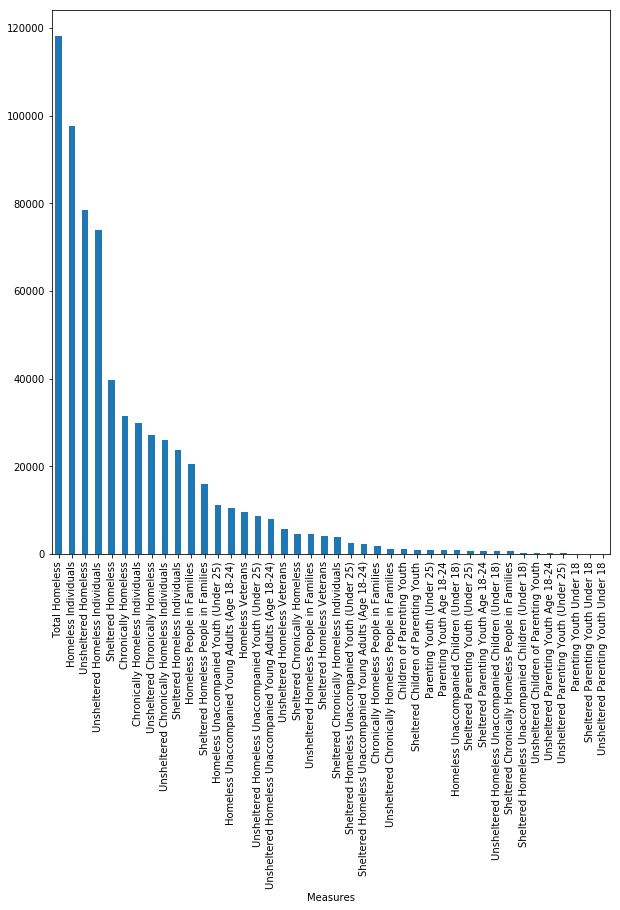

In [717]:
#what categories ?
cal.groupby('Measures')['Count'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

In [718]:
#Let's standarize with the population
df_2016 = df_2016[df_2016['Measures']=='Total Homeless']
df_2016 = df_2016.groupby(['State','Year',])[['Count']].sum()
df_2016.head()

,,Count
State,Year,
AK,2016,1940
AL,2016,4111
AR,2016,2463
AZ,2016,9707
CA,2016,118142


In [719]:
df_2016.reset_index(inplace=True)

In [720]:
df_2016 = df_2016.merge(df_pop, on='State')
df_2016.head()

,State,Year,Count,2010,2011,2012,2013,2014,2015,2016
0,AK,2016,1940,714031,722713,731089,736879,736705,737709,741894
1,AL,2016,4111,4785492,4799918,4815960,4829479,4843214,4853875,4863300
2,AR,2016,2463,2921995,2939493,2950685,2958663,2966912,2977853,2988248
3,AZ,2016,9707,6408312,6467163,6549634,6624617,6719993,6817565,6931071
4,CA,2016,118142,37332685,37676861,38011074,38335203,38680810,38993940,39250017


In [721]:
#what percent of the population are homeless?
df_2016['per'] = df_2016['Count']/df_2016['2016']

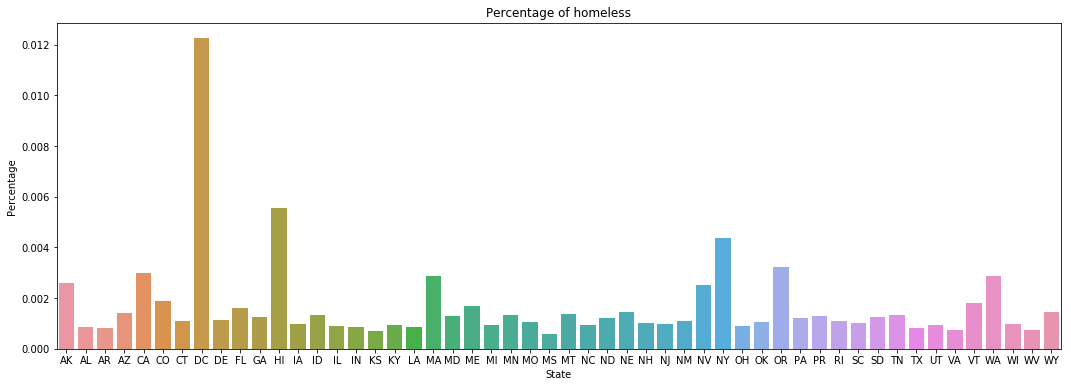

In [722]:
plt.figure(figsize=(18,6))
sns.barplot(y='per', x='State', data=df_2016)
plt.ylabel('Percentage')
plt.title('Percentage of homeless')

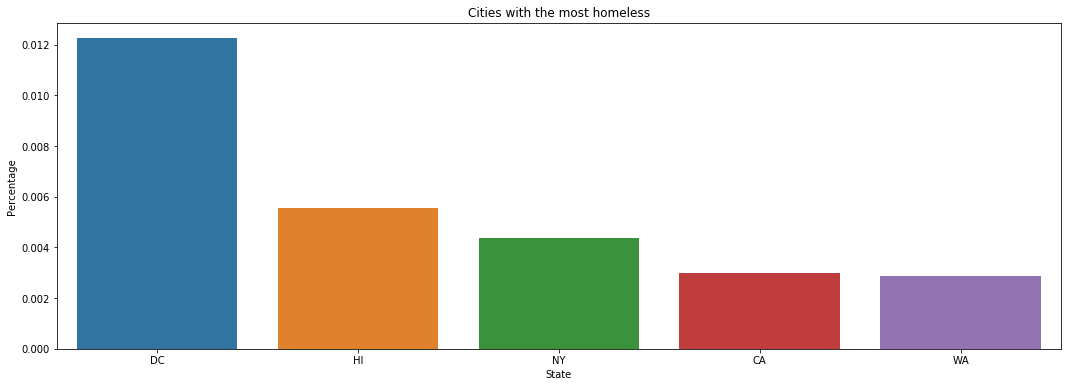

In [723]:
plt.figure(figsize=(18,6))
sns.barplot(y='per', x='State', data=df_2016, order=["DC", "HI", "NY", "CA", "WA"])
plt.ylabel('Percentage')
plt.title('Cities with the most homeless')